In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_excel(r"C:\Users\nehap\Downloads\TRIVAGO EDA PROJECT DATA.xlsx")

In [5]:
data.head()

,Hotel Name,Price,Rating,Total Ratings,Distance from City Center,Region
0,"Holiday Inn Express Bengaluru Yeshwantpur, an ...","₹4,491",7.5,3813.0,7.8 km to City centre,Bengaluru
1,ibis Bengaluru Hosur Road - An Accor Brand,"₹5,264",7.5,1686.0,8.9 km to City centre,Bengaluru
2,"Howard Johnson By Wyndham, Hebbal, Bengaluru","₹6,903",8.1,11441.0,8.3 km to City centre,Bengaluru
3,Grand Continent Malleshwaram A Sarovar Portico...,"₹3,584",9.3,7.0,3.0 km to City centre,Bengaluru
4,Sri Kumara Lodge,₹983,8.1,619.0,2.1 km to City centre,Bengaluru


In [6]:
data.shape

(2995, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hotel Name                 2995 non-null   object 
 1   Price                      2995 non-null   object 
 2   Rating                     2870 non-null   float64
 3   Total Ratings              2870 non-null   float64
 4   Distance from City Center  2995 non-null   object 
 5   Region                     2995 non-null   object 
dtypes: float64(2), object(4)
memory usage: 140.5+ KB


## Data Cleaning

In [8]:
data['Price'] = data['Price'].replace('[₹,]','',regex = True).astype(float)

In [9]:
data["Distance (km)"] = data["Distance from City Center"].str.replace("km to City centre", "", regex=False)
data["Distance (km)"] = pd.to_numeric(data["Distance (km)"], errors="coerce")

In [11]:
data.head()

,Hotel Name,Price,Rating,Total Ratings,Distance from City Center,Region,Distance (km)
0,"Holiday Inn Express Bengaluru Yeshwantpur, an ...",4491.0,7.5,3813.0,7.8 km to City centre,Bengaluru,7.8
1,ibis Bengaluru Hosur Road - An Accor Brand,5264.0,7.5,1686.0,8.9 km to City centre,Bengaluru,8.9
2,"Howard Johnson By Wyndham, Hebbal, Bengaluru",6903.0,8.1,11441.0,8.3 km to City centre,Bengaluru,8.3
3,Grand Continent Malleshwaram A Sarovar Portico...,3584.0,9.3,7.0,3.0 km to City centre,Bengaluru,3.0
4,Sri Kumara Lodge,983.0,8.1,619.0,2.1 km to City centre,Bengaluru,2.1


In [12]:
data = data.drop(columns =['Distance from City Center'])

In [38]:
data.head()

,Hotel Name,Price,Rating,Total Ratings,Region,Distance (km)
0,"Holiday Inn Express Bengaluru Yeshwantpur, an ...",4491.0,7.5,3813.0,Bengaluru,7.8
1,ibis Bengaluru Hosur Road - An Accor Brand,5264.0,7.5,1686.0,Bengaluru,8.9
2,"Howard Johnson By Wyndham, Hebbal, Bengaluru",6903.0,8.1,11441.0,Bengaluru,8.3
3,Grand Continent Malleshwaram A Sarovar Portico...,3584.0,9.3,7.0,Bengaluru,3.0
4,Sri Kumara Lodge,983.0,8.1,619.0,Bengaluru,2.1


In [13]:
data.isna().sum()

Hotel Name         0
Price              0
Rating           125
Total Ratings    125
Region             0
Distance (km)     24
dtype: int64

In [16]:
data.dropna(inplace=True)

In [17]:
data.isna().sum()

Hotel Name       0
Price            0
Rating           0
Total Ratings    0
Region           0
Distance (km)    0
dtype: int64

In [18]:
data.duplicated().sum()

2565

In [20]:
data.drop_duplicates(inplace=True)

In [22]:
data.duplicated().sum()

0

In [21]:
data.head()

,Hotel Name,Price,Rating,Total Ratings,Region,Distance (km)
0,"Holiday Inn Express Bengaluru Yeshwantpur, an ...",4491.0,7.5,3813.0,Bengaluru,7.8
1,ibis Bengaluru Hosur Road - An Accor Brand,5264.0,7.5,1686.0,Bengaluru,8.9
2,"Howard Johnson By Wyndham, Hebbal, Bengaluru",6903.0,8.1,11441.0,Bengaluru,8.3
3,Grand Continent Malleshwaram A Sarovar Portico...,3584.0,9.3,7.0,Bengaluru,3.0
4,Sri Kumara Lodge,983.0,8.1,619.0,Bengaluru,2.1


## Univariate Non Visual analysis

In [24]:
print("\nPrice Range: Min =", data['Price'].min(), ", Max =", data['Price'].max())
print("Average Price:", data['Price'].mean())


Price Range: Min = 575.0 , Max = 25299.0
Average Price: 3846.103202846975


In [26]:
# Price insights per city (Region)
city_price_stats = data.groupby('Region')['Price'].agg(['min', 'max', 'mean']).reset_index()

for _, row in city_price_stats.iterrows():
    print(f"\nCity: {row['Region']}")
    print(f"Price Range: Min = {row['min']}, Max = {row['max']}")
    print(f"Average Price: {row['mean']:.2f}")


City: Bengaluru
Price Range: Min = 705.0, Max = 20060.0
Average Price: 4842.14

City: Chikmagalur
Price Range: Min = 1008.0, Max = 24350.0
Average Price: 5090.66

City: Gokarna
Price Range: Min = 575.0, Max = 5141.0
Average Price: 1687.17

City: Hampi
Price Range: Min = 671.0, Max = 14169.0
Average Price: 2460.77

City: Kodagu
Price Range: Min = 914.0, Max = 25299.0
Average Price: 4889.91

City: Madikeri
Price Range: Min = 1099.0, Max = 10620.0
Average Price: 3605.17

City: Mangalore
Price Range: Min = 896.0, Max = 14665.0
Average Price: 3628.71

City: Mysore
Price Range: Min = 761.0, Max = 10012.0
Average Price: 3993.40

City: Udipi
Price Range: Min = 2367.0, Max = 10323.0
Average Price: 4850.00


In [27]:
# Top rated hotels in each city
top_hotels = data.loc[data.groupby("Region")["Rating"].idxmax(), 
                      ["Region", "Hotel Name", "Rating", "Price", "Total Ratings", "Distance (km)"]]

print("Top Rated Hotels in Each City:\n")
for _, row in top_hotels.iterrows():
    print(f"City: {row['Region']}")
    print(f"Hotel: {row['Hotel Name']}")
    print(f"Rating: {row['Rating']}")
    print(f"Price: {row['Price']}")
    print(f"Total Ratings: {row['Total Ratings']}")
    print(f"Distance: {row['Distance (km)']} km")
    print("-"*50)

Top Rated Hotels in Each City:

City: Bengaluru
Hotel: Rustic Meets Luxe…
Rating: 9.8
Price: 9358.0
Total Ratings: 39.0
Distance: 7.3 km
--------------------------------------------------
City: Chikmagalur
Hotel: Sanctum Luxury Serviced Apartments
Rating: 9.8
Price: 6305.0
Total Ratings: 80.0
Distance: 0.6 km
--------------------------------------------------
City: Gokarna
Hotel: Areca Nest
Rating: 9.6
Price: 2912.0
Total Ratings: 65.0
Distance: 1.5 km
--------------------------------------------------
City: Hampi
Hotel: Druva Homestay
Rating: 9.7
Price: 1237.0
Total Ratings: 40.0
Distance: 2.7 km
--------------------------------------------------
City: Kodagu
Hotel: Pragathi Homestay For 6 People @ Coorg/madikeri
Rating: 9.5
Price: 6558.0
Total Ratings: 80.0
Distance: 0.7 km
--------------------------------------------------
City: Madikeri
Hotel: Royal Palm Homestay
Rating: 9.9
Price: 4424.0
Total Ratings: 24.0
Distance: 0.7 km
--------------------------------------------------
City: 

In [31]:
# min,max,average rating
rating_summary = data.groupby("Region")["Rating"].agg(["mean", "median", "min", "max"])
print("\nAverage Ratings by City:\n", rating_summary)


Average Ratings by City:
                  mean  median  min  max
Region                                 
Bengaluru    8.108571     7.9  6.5  9.8
Chikmagalur  8.245714     8.3  6.3  9.8
Gokarna      7.996552     8.1  5.1  9.6
Hampi        8.094286     8.0  6.1  9.7
Kodagu       7.954286     8.2  4.9  9.5
Madikeri     8.171429     8.1  5.9  9.9
Mangalore    8.042857     8.0  5.4  9.9
Mysore       8.631429     8.7  5.8  9.8
Udipi        8.142857     8.6  5.8  9.9


In [32]:
# Most popular hotel by ratings
most_popular = data.loc[data.groupby("Region")["Total Ratings"].idxmax(), 
                        ["Region", "Hotel Name", "Total Ratings", "Rating", "Price"]]

print("\nMost Popular Hotels (highest total ratings) per City:\n", most_popular)


Most Popular Hotels (highest total ratings) per City:
            Region                                      Hotel Name  \
26      Bengaluru  Holiday Inn Bengaluru Racecourse, an IHG Hotel   
1214  Chikmagalur     The Grand Krishna Luxury Hotel, Chikmagalur   
2859      Gokarna                   Trippr Gokarna - Beach Hostel   
2736        Hampi                              Hotel Rock Regency   
2414       Kodagu             Coorg Jungle Camp Back water Resort   
2140     Madikeri             Treebo Trend New Redfern - Madikeri   
1976    Mangalore                   The Estate Resort , Mangalore   
1526       Mysore           Grand Mercure Mysore - An Accor Brand   
1367        Udipi                                         Hangout   

      Total Ratings  Rating   Price  
26          17998.0     8.8  9918.0  
1214         2000.0     7.9  1877.0  
2859         3515.0     8.1   845.0  
2736         4761.0     7.8  3965.0  
2414         2372.0     7.9  8288.0  
2140        11266.0     8

## Univariate Visual analysis

C:\Users\nehap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


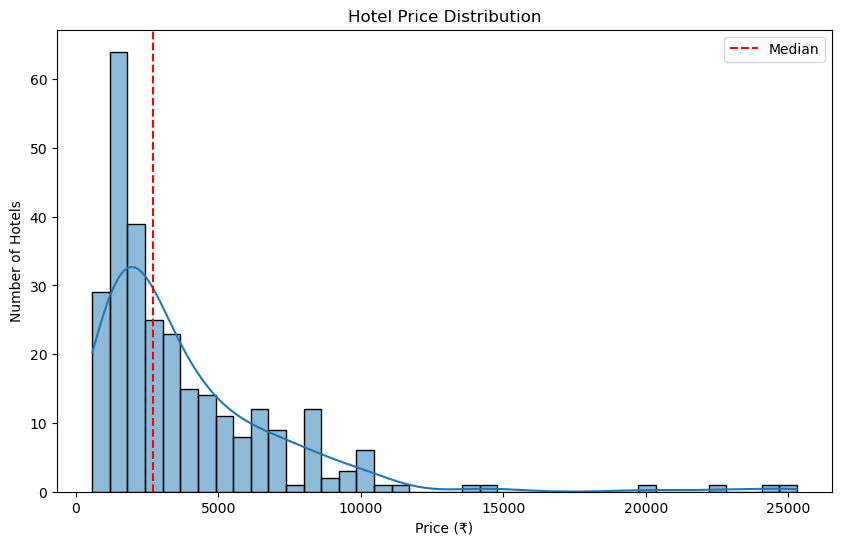

In [33]:
# Price Distribution(continuous)
plt.figure(figsize=(10,6))
sns.histplot(data['Price'], bins=40, kde=True)
plt.axvline(data['Price'].median(), color='red', linestyle='--', label='Median')
plt.title("Hotel Price Distribution")
plt.xlabel("Price (₹)")
plt.ylabel("Number of Hotels")
plt.legend()
plt.show()

C:\Users\nehap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


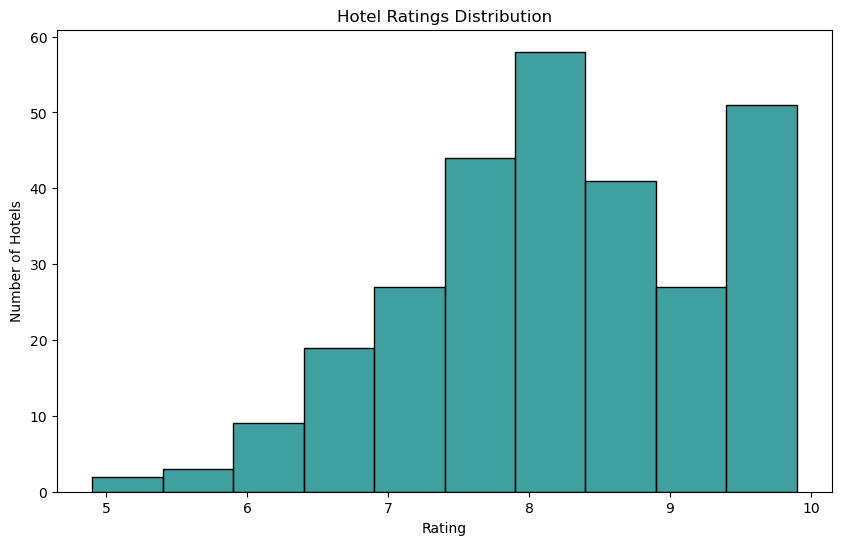

In [35]:
# Ratings Distribution (continuous but bounded 0–10)
plt.figure(figsize=(10,6))
sns.histplot(data['Rating'].dropna(), bins=10, kde=False, color="teal")
plt.title("Hotel Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Hotels")
plt.show()

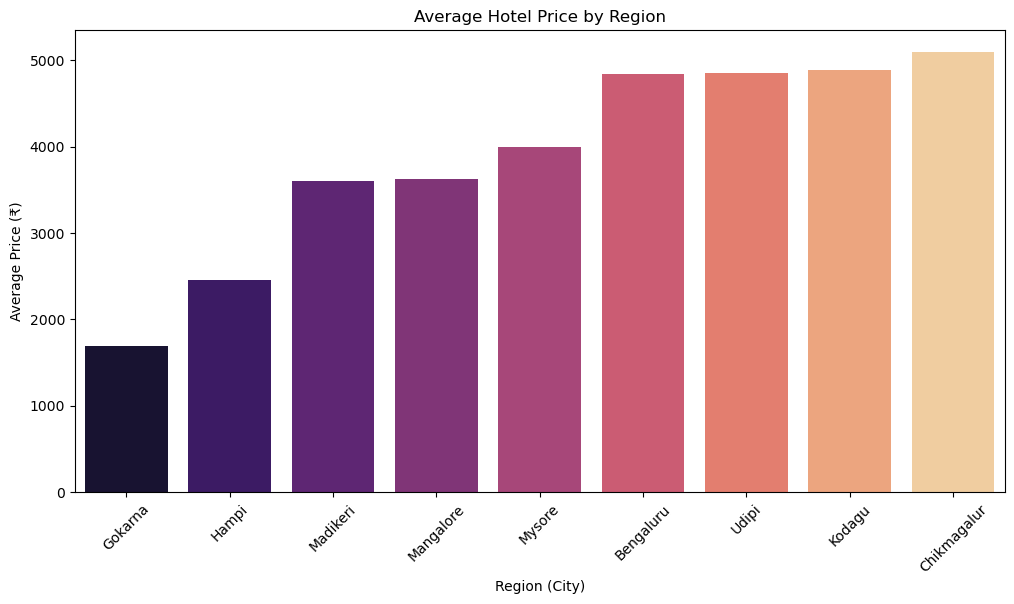

In [36]:
# average Price of hotel in every city
plt.figure(figsize=(12,6))
avg_price = data.groupby("Region")["Price"].mean().sort_values()
sns.barplot(x=avg_price.index, y=avg_price.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Average Hotel Price by Region")
plt.xlabel("Region (City)")
plt.ylabel("Average Price (₹)")
plt.show()

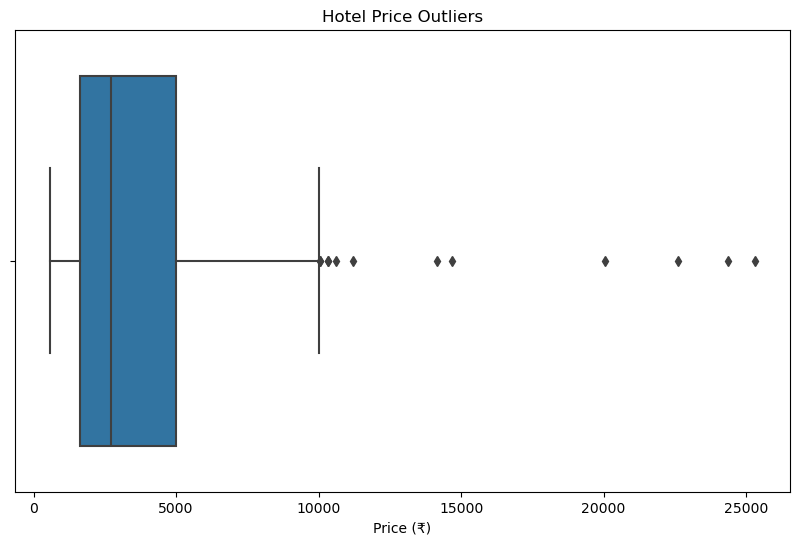

In [37]:
# Hotel Price Outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Price'])
plt.title("Hotel Price Outliers")
plt.xlabel("Price (₹)")
plt.show()

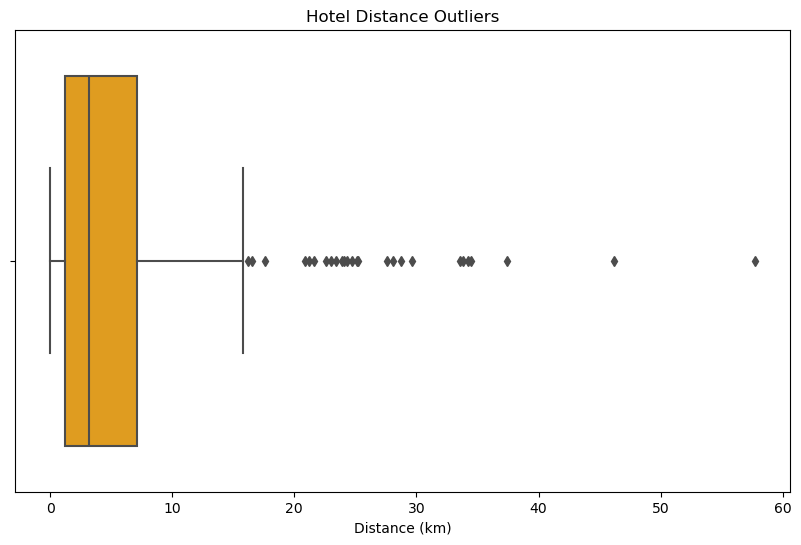

In [39]:
# Hotel Distance from city centre
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Distance (km)'], color="orange")
plt.title("Hotel Distance Outliers")
plt.xlabel("Distance (km)")
plt.show()

## Multivariate Non-Visual Analysis

In [40]:
print("\nCorrelation Matrix:\n", data.corr(numeric_only=True))


Correlation Matrix:
                   Price    Rating  Total Ratings  Distance (km)
Price          1.000000  0.319215       0.229481       0.246135
Rating         0.319215  1.000000       0.047704       0.011315
Total Ratings  0.229481  0.047704       1.000000      -0.003215
Distance (km)  0.246135  0.011315      -0.003215       1.000000


In [41]:
# Average rating vs Price rate
avg_price_rating = data.groupby("Region")[["Price", "Rating"]].mean()
print("\nAverage Price & Rating per Region:\n", avg_price_rating)


Average Price & Rating per Region:
                    Price    Rating
Region                            
Bengaluru    4842.142857  8.108571
Chikmagalur  5090.657143  8.245714
Gokarna      1687.172414  7.996552
Hampi        2460.771429  8.094286
Kodagu       4889.914286  7.954286
Madikeri     3605.171429  8.171429
Mangalore    3628.714286  8.042857
Mysore       3993.400000  8.631429
Udipi        4850.000000  8.142857


In [42]:
# Hotels with High Price but Low Rating
low_value_hotels = data[(data['Price'] > data['Price'].median()) & (data['Rating'] < data['Rating'].median())]
print("\nHotels that are Expensive but Poorly Rated:\n", low_value_hotels[['Hotel Name','Region','Price','Rating']].head(10))


Hotels that are Expensive but Poorly Rated:
                                              Hotel Name       Region   Price  \
0     Holiday Inn Express Bengaluru Yeshwantpur, an ...    Bengaluru  4491.0   
1            ibis Bengaluru Hosur Road - An Accor Brand    Bengaluru  5264.0   
9                                               Vividus    Bengaluru  4164.0   
11        Click Hotel Bangalore - International Airport    Bengaluru  4612.0   
13                                       Shivas Gateway    Bengaluru  3880.0   
18    Fortune Park JP Celestial, Bengaluru - Member ...    Bengaluru  6550.0   
24    Country Inn & Suites By Radisson, Bengaluru He...    Bengaluru  8064.0   
33    Holiday Inn Express Bengaluru Whitefield ITPL,...    Bengaluru  5128.0   
1207                          7 Heaven Villas & Resorts  Chikmagalur  8399.0   
1211                                  Siri Nature Roost  Chikmagalur  8023.0   

      Rating  
0        7.5  
1        7.5  
9        7.8  
11       7.9 

In [45]:
# Popularity vs Rating
popularity_rating = data.groupby(pd.cut(data['Total Ratings'], bins=[0,100,1000,5000,20000]))['Rating'].mean()
print("\nAverage Rating by Popularity Category:\n", popularity_rating)


Average Rating by Popularity Category:
 Total Ratings
(0, 100]         8.280645
(100, 1000]      8.000990
(1000, 5000]     8.075000
(5000, 20000]    8.357143
Name: Rating, dtype: float64


C:\Users\nehap\AppData\Local\Temp\ipykernel_14824\2225216479.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_rating = data.groupby(pd.cut(data['Total Ratings'], bins=[0,100,1000,5000,20000]))['Rating'].mean()


# Multi-Variate Visual Analysis

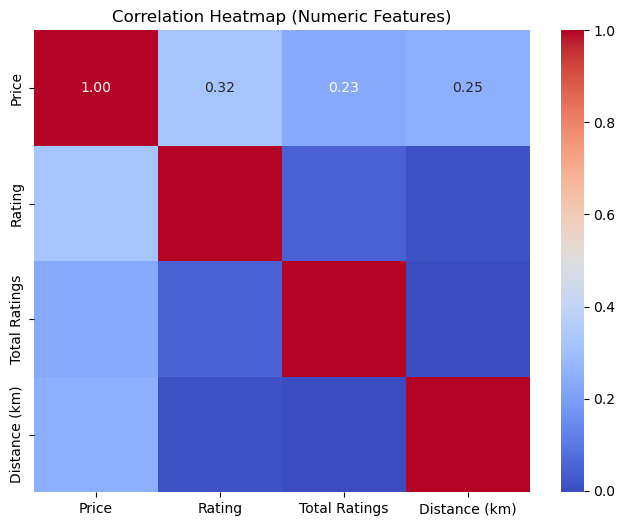

In [46]:
# Co-relation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

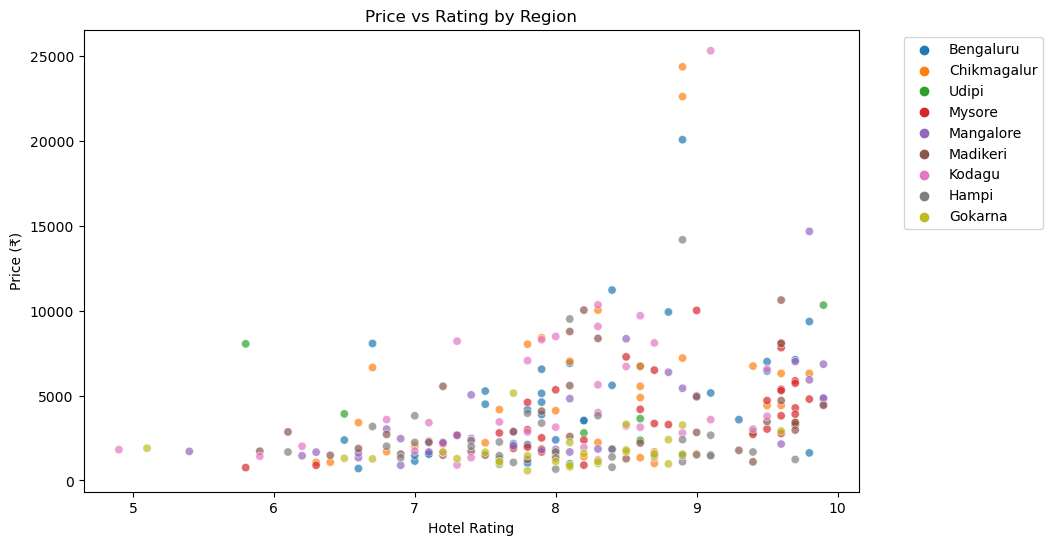

In [47]:
# Price vs Rating Scatterplot (colored by Region)
plt.figure(figsize=(10,6))
sns.scatterplot(x="Rating", y="Price", hue="Region", data=data, alpha=0.7)
plt.title("Price vs Rating by Region")
plt.xlabel("Hotel Rating")
plt.ylabel("Price (₹)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

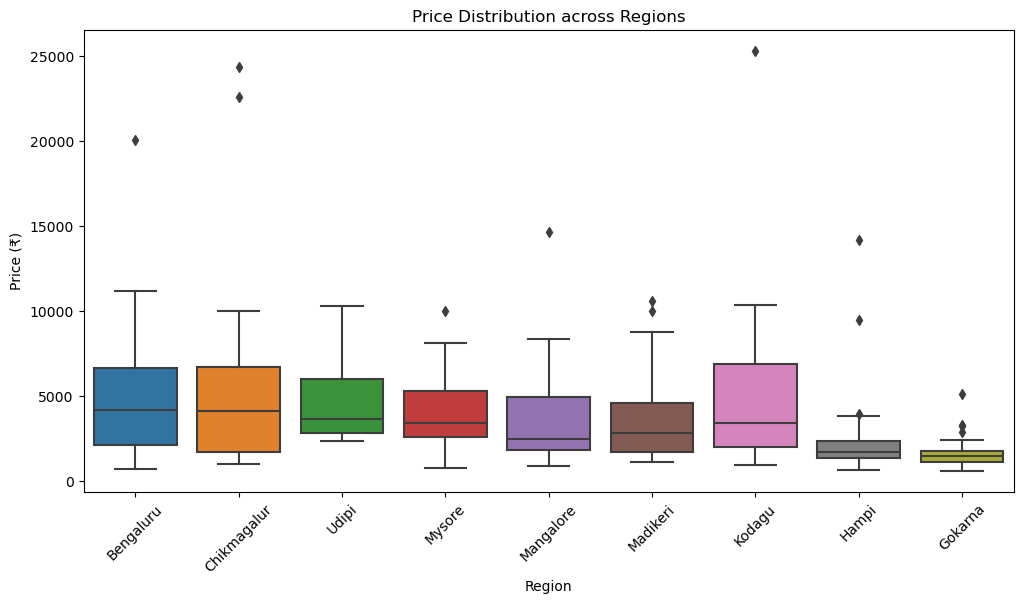

In [48]:
# Price Distribution by Region
plt.figure(figsize=(12,6))
sns.boxplot(x="Region", y="Price", data=data)
plt.xticks(rotation=45)
plt.title("Price Distribution across Regions")
plt.ylabel("Price (₹)")
plt.show()

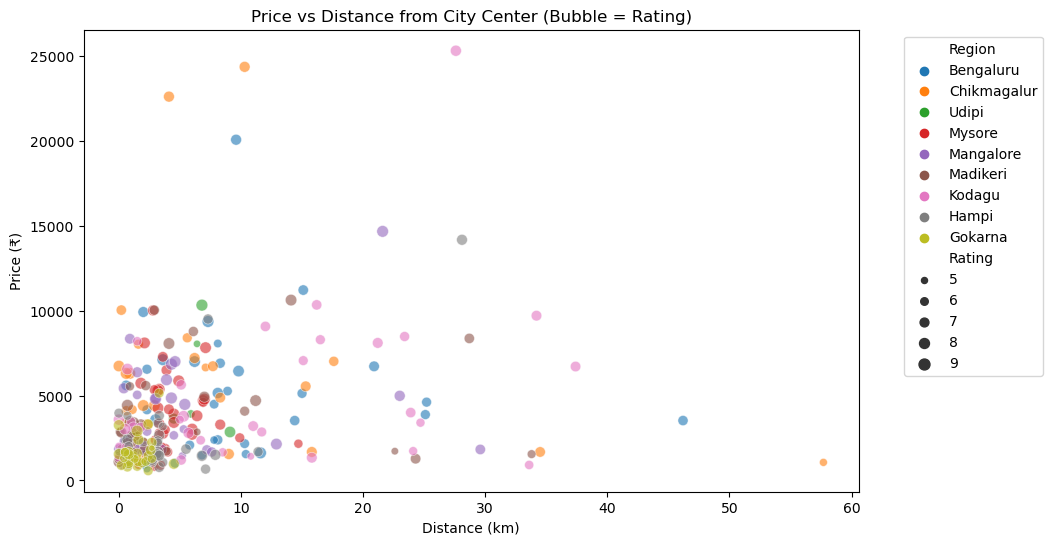

In [50]:
# Distance vs Price Scatter (colored by Rating)
plt.figure(figsize=(10,6))
sns.scatterplot(x="Distance (km)", y="Price", size="Rating", hue="Region", data=data, alpha=0.6)
plt.title("Price vs Distance from City Center (Bubble = Rating)")
plt.xlabel("Distance (km)")
plt.ylabel("Price (₹)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

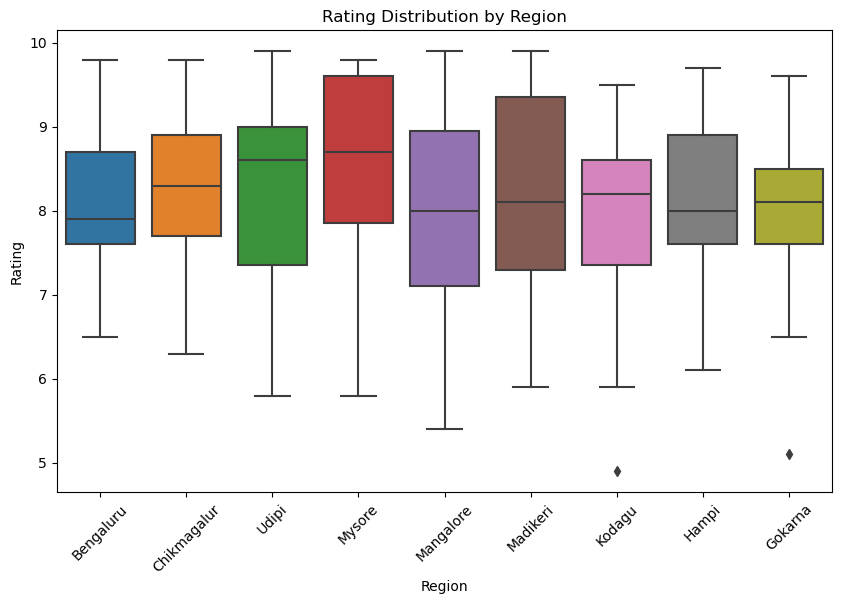

In [56]:
# Region vs Rating
plt.figure(figsize=(10,6))
sns.boxplot(x="Region", y="Rating", data=data)
plt.xticks(rotation=45)
plt.title("Rating Distribution by Region")
plt.show()

In [ ]:
g = sns.PairGrid(data[['Price','Rating','Distance (km)']])
g.map_lower(sns.kdeplot, fill=True, cmap="mako")
g.map_upper(sns.scatterplot, alpha=0.4)
g.map_diag(sns.histplot, kde=True, color="skyblue")
plt.suptitle("Pairwise Multivariate Analysis (Price, Rating, Distance)", y=1.02)
plt.show()


In [60]:
data.columns

Index(['Hotel Name', 'Price', 'Rating', 'Total Ratings', 'Region',
       'Distance (km)'],
      dtype='object')